In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height",
           "Orientation", "Glazing_Area", "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]
data.columns = columns
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [6]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (768, 10)


In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [76]:
data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


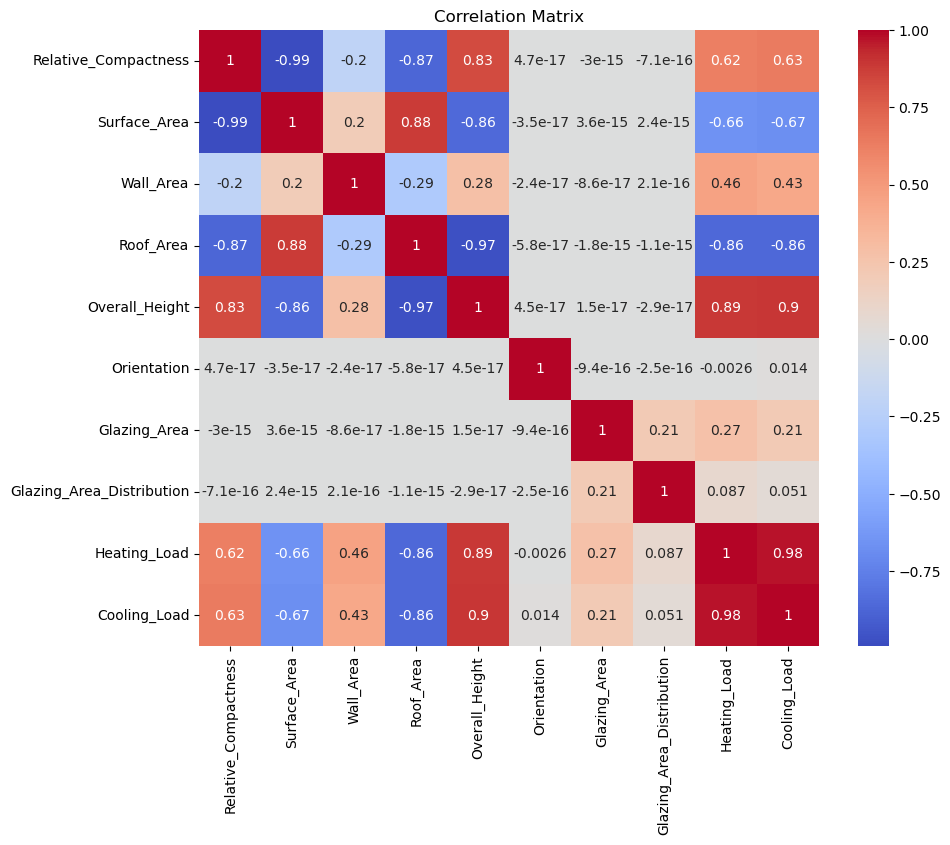

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

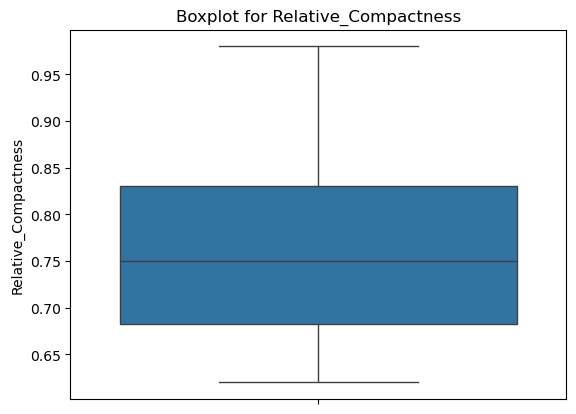

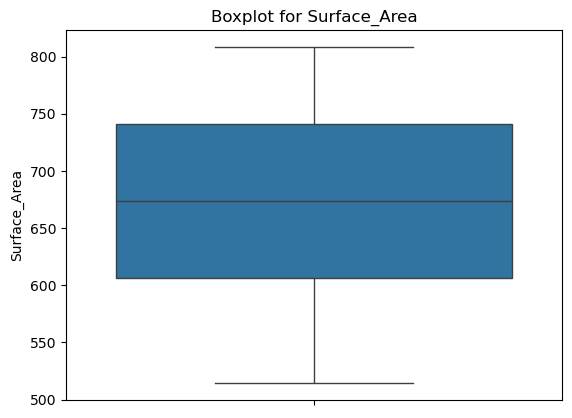

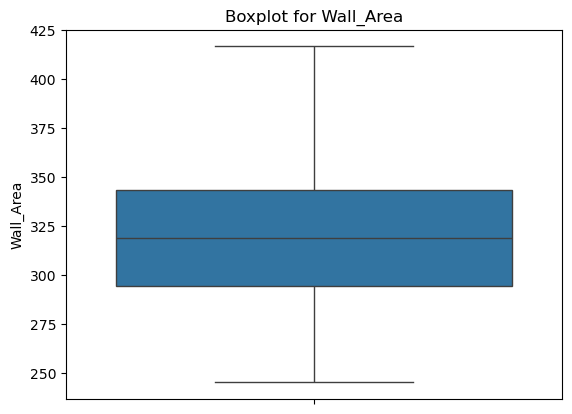

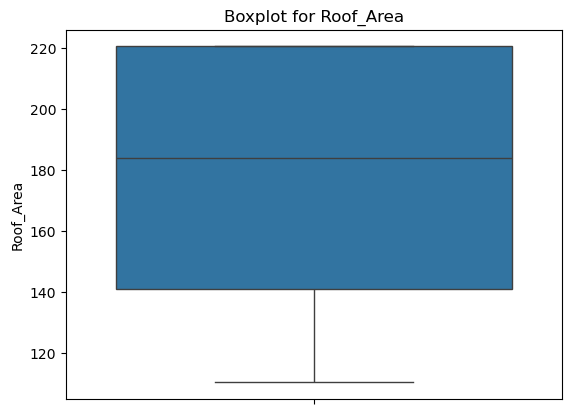

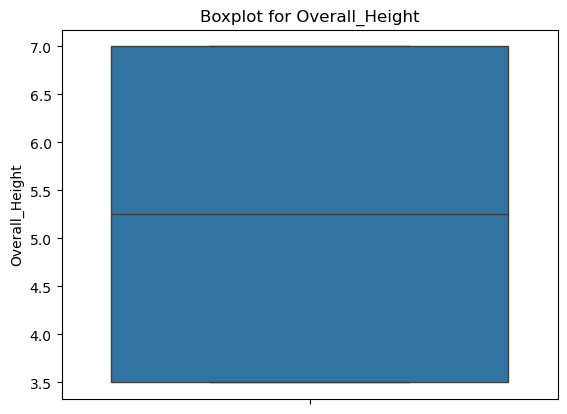

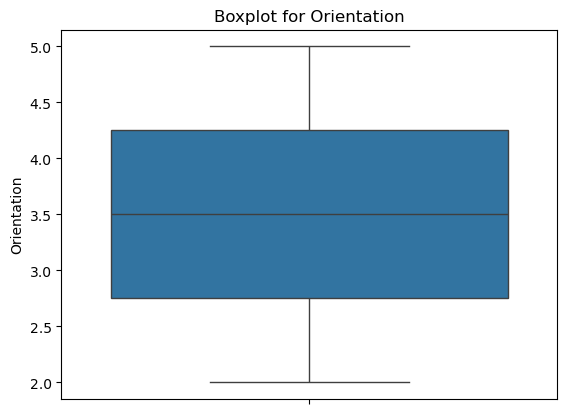

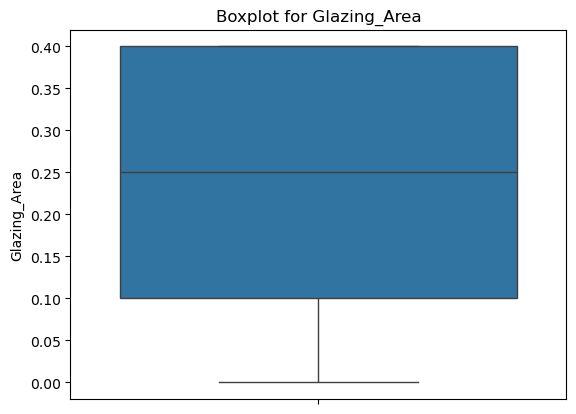

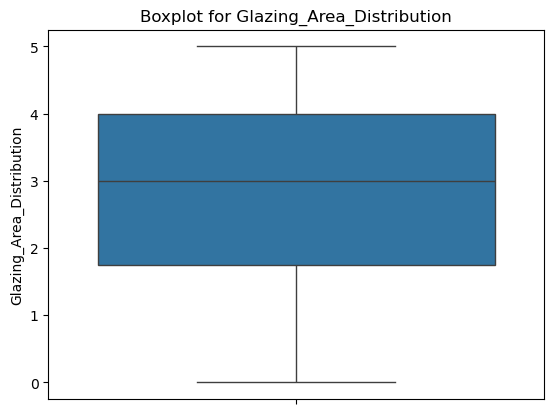

In [12]:
# Checking for outliers using boxplots
numerical_cols = data.columns[:-2]  # Excluding target variables
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [13]:
# Features and target
X = data.drop(["Heating_Load", "Cooling_Load"], axis=1)
y = data["Heating_Load"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
60,0.82,612.5,318.5,147.00,7.0,2,0.10,1
618,0.64,784.0,343.0,220.50,3.5,4,0.40,2
346,0.86,588.0,294.0,147.00,7.0,4,0.25,2
294,0.90,563.5,318.5,122.50,7.0,4,0.25,1
231,0.66,759.5,318.5,220.50,3.5,5,0.10,4
...,...,...,...,...,...,...,...,...
71,0.76,661.5,416.5,122.50,7.0,5,0.10,1
106,0.86,588.0,294.0,147.00,7.0,4,0.10,2
270,0.71,710.5,269.5,220.50,3.5,4,0.10,5
435,0.98,514.5,294.0,110.25,7.0,5,0.25,4


In [17]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term

        # Using pseudo-inverse for stability in case X.T @ X is not invertible
        self.coefficients = np.linalg.pinv(X.T @ X) @ X.T @ y  # Normal equation

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
        return X @ self.coefficients

# Training the manual linear regression model
manual_lr = LinearRegressionFromScratch()
manual_lr.fit(X_train.values, y_train.values)
y_pred_manual = manual_lr.predict(X_test.values)

In [68]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [70]:
# Evaluation Metrics Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")
    return mse, rmse, r2

# Manual Linear Regression
evaluate_model(y_test, y_pred_manual, "Manual Linear Regression")

# Sklearn Models
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Manual Linear Regression - MSE: 9.15, RMSE: 3.03, R2 Score: 0.91
Sklearn Linear Regression - MSE: 9.19, RMSE: 3.03, R2 Score: 0.91
Ridge Regression - MSE: 9.16, RMSE: 3.03, R2 Score: 0.91
Lasso Regression - MSE: 9.25, RMSE: 3.04, R2 Score: 0.91


(9.2450843898478, 3.040573036427147, 0.9113031690090754)

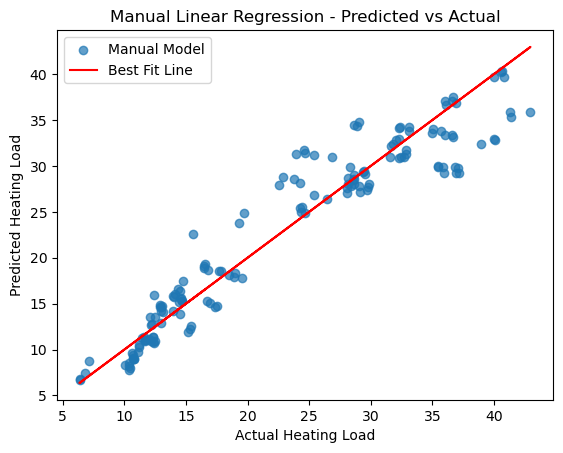

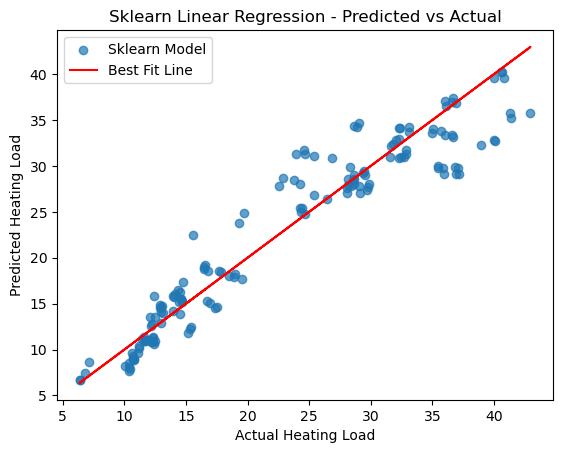

In [72]:
# Predicted vs Actual Plot for Manual Model
plt.scatter(y_test, y_pred_manual, alpha=0.7, label="Manual Model")
plt.plot(y_test, y_test, color="red", label="Best Fit Line")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Manual Linear Regression - Predicted vs Actual")
plt.show()

# Predicted vs Actual Plot for Sklearn Model
plt.scatter(y_test, y_pred_lr, alpha=0.7, label="Sklearn Model")
plt.plot(y_test, y_test, color="red", label="Best Fit Line")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Sklearn Linear Regression - Predicted vs Actual")
plt.show()


In [73]:
'''Insights and Suggestions for Energy Efficiency->
    
   Based on the correlation matrix and regression coefficients:

1.Relative Compactness vs. Heating Load:

a.Correlation: 0.62 (Moderate positive correlation)
b.Interpretation: Higher relative compactness is moderately associated with increased heating load. This could be due to reduced surface area for heat dissipation.
c.Suggestion: Optimize relative compactness while ensuring proper insulation to minimize heat retention without compromising energy efficiency.

2.Surface Area vs. Heating Load:

a.Correlation: -0.66 (Moderate negative correlation)
b.Interpretation: Larger surface areas are associated with a lower heating load, potentially due to better heat dispersion.
c.Suggestion: Increase surface area strategically and ensure these surfaces are insulated with energy-efficient materials.

3.Wall Area vs. Heating Load:

a.Correlation: 0.46 (Moderate positive correlation)
b.Interpretation: Larger wall areas are moderately associated with increased heating loads.
c.Suggestion: Focus on improving wall insulation and reducing unnecessary wall expansions to maintain energy efficiency.

4.Roof Area vs. Heating Load:

a.Correlation: -0.86 (Strong negative correlation)
b.Interpretation: Larger roof areas significantly reduce the heating load, indicating that roofs play a crucial role in heat dispersion.
c.Suggestion: Prioritize larger, well-insulated roofs and consider energy-efficient roofing materials like reflective coatings.

5.Overall Height vs. Heating Load:

a.Correlation: 0.89 (Strong positive correlation)
b.Interpretation: Taller buildings are strongly associated with higher heating loads, likely due to increased vertical heat retention.
c.Suggestion: Optimize building height and ensure stratified insulation to reduce heat retention at higher levels.

'''

'Insights and Suggestions for Energy Efficiency->\n    \n   Based on the correlation matrix and regression coefficients:\n\n1.High heating load correlates with surface area, wall area, and overall height.\n2.Reducing unnecessary wall area and optimizing the roof design can significantly reduce the heating load.\n3.Increasing glazing area improves energy efficiency but should be distributed optimally based on orientation.\n4.Utilize insulation materials to minimize heat loss through walls and roofs.'